<a href="https://colab.research.google.com/github/Gabuni19/GabUni--Codigos-cpp/blob/main/Problema_del_Agente_Viajero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TSP (✈) - `Traveling Salesman Problem`

### FUERZA BRUTA

In [ ]:
import numpy as np

In [ ]:
def FirstRestriction(x,n):
  for j in range(n):
    s=0
    for i in range(n):
      if i!=j:
        s += x[i][j]
    # La suma para este J debe ser 1
    if(s!=1):
      return False
  return True

In [ ]:
def SecondRestriction(x,n):
  for i in range(n):
    s=0
    for j in range(n):
      if j!=i:
        s += x[i][j]
    # La suma para este i debe ser 1
    if(s!=1):
      return False
  return True


In [ ]:
def ThirdRestriction(x,n):
  ini = 2
  fin = n-2;
  conjunto = list(range(n))
  for n_sub in range(ini,fin+1):
    for U in subConjunto(n,n_sub):
      s = 0
      for i in U:
        for j in Complemento(U,n):
          s += x[i][j]
      if s<1:
        return False
  return True

In [ ]:
def subConjunto(n,m):
  # n>m
  Subconjuntos = []
  for i in range(2**n):
    binario = bin(i)[2:].zfill(n)
    if(binario.count("1")== m ):
      combinacion = [j for j,bit in enumerate(binario) if bit=="1"]
      Subconjuntos.append(combinacion)
  return Subconjuntos

In [ ]:
def Complemento(U,n):
  return [j for j in range(n) if all(j != k for k in U)]

In [ ]:
Complemento([1,2],5)

[0, 3, 4]

In [ ]:
x = np.array([
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1],
    [1,0,0,0]
])

In [ ]:
FirstRestriction(x,4)

True

In [ ]:
SecondRestriction(x,4)

True

In [ ]:
ThirdRestriction(x,4)

True

In [ ]:
def P_X(n, m):
    def Recursiva(x, fila, columna, m_rest, n):
        if m_rest == 0:
            lpos.append(x.copy())
            return
        for i in range(n):
            for j in range(n):
                if i != j and x[i][j] == 0:
                    x[i][j] = 1
                    Recursiva(x, i, j, m_rest-1, n)
                    x[i][j] = 0

    lpos = []  # Lista para almacenar las posiciones
    x = np.zeros((n, n), dtype=int)
    Recursiva(x, 0, 0, m, n)
    return lpos

In [ ]:
resultados = P_X(2,1)

In [ ]:
for matriz in resultados:
    print(matriz)

[[0 1]
 [0 0]]
[[0 0]
 [1 0]]


In [ ]:
W = np.array([
    [0,6,9,3],
    [6,0,5,4],
    [9,5,0,7],
    [3,4,7,0]
])

In [ ]:
X = np.array([
    [0,6,9,3],
    [6,0,5,4],
    [9,5,0,7],
    [3,4,7,0]
])

In [ ]:
np.sum(X*W)

432

In [ ]:
np.shape(W)

(4, 4)

In [ ]:
import numpy as np
import time

def FirstRestriction(x,n):
  for j in range(n):
    s=0
    for i in range(n):
      if i!=j:
        s += x[i][j]
    # La suma para este J debe ser 1
    if(s!=1):
      return False
  return True

def SecondRestriction(x,n):
  for i in range(n):
    s=0
    for j in range(n):
      if j!=i:
        s += x[i][j]
    # La suma para este i debe ser 1
    if(s!=1):
      return False
  return True

def ThirdRestriction(x,n):
  ini = 2
  fin = n-2;
  conjunto = list(range(n))
  for n_sub in range(ini,fin+1):
    for U in subConjunto(n,n_sub):
      s = 0
      for i in U:
        for j in Complemento(U,n):
          s += x[i][j]
      if s<1:
        return False
  return True

def subConjunto(n,m):
  # n>m
  Subconjuntos = []
  for i in range(2**n):
    binario = bin(i)[2:].zfill(n)
    if(binario.count("1")== m ):
      combinacion = [j for j,bit in enumerate(binario) if bit=="1"]
      Subconjuntos.append(combinacion)
  return Subconjuntos

def Complemento(U,n):
  return [j for j in range(n) if all(j != k for k in U)]

def CheckRestrictions(X,N):
  cond1 = FirstRestriction(X,N)
  cond2 = SecondRestriction(X,N)
  cond3 = ThirdRestriction(X,N)
  return cond1 and cond2 and cond3

def Costo(X,W):
  return np.sum(X*W)

def P_X(n, m):
    def Recursiva(x, fila, columna, m_rest, n):
        if m_rest == 0:
            lpos.append(x.copy())
            return
        for i in range(n):
            for j in range(n):
                if i != j and x[i][j] == 0:
                    x[i][j] = 1
                    Recursiva(x, i, j, m_rest-1, n)
                    x[i][j] = 0

    lpos = []  # Lista para almacenar las posiciones
    x = np.zeros((n, n), dtype=int)
    Recursiva(x, 0, 0, m, n)
    return lpos

def AgenteViajero_FuerzaBruta(W):
  print("=== TSP - FUERZA BRUTA ===\n")

  # inicio del tiempo
  inicio = time.time()

  # Almacenamos el N
  n_f,n_c = np.shape(W)
  N = n_f

  # Almacenamos las Posibles Soluciones
  Posibles_Xij = P_X(N,N)
  # Variable solucion
  S = []
  minCosto = 99999
  #Buscamos el Minimo
  for Xij in Posibles_Xij:
    if(CheckRestrictions(Xij,N) and (Costo(Xij,W)) < minCosto ):
      minCosto = Costo(Xij,W)
      S = Xij

  fin = time.time()

  #Calculamos el tiempo
  T_time = fin - inicio

  # Mostramos Solucion
  print(f" [+] Tiempo : {T_time} s")
  print(f" [+] Costo Minimo : {minCosto}")
  print(f" [+] Solución : \n{S}")

  # Mostramos Camino
  print(f" \n[+] Camino Solucion:")
  for i in range(N):
    for j in range(N):
      if S[i][j]==1:
        print(f"{i+1}- ( Peso : {W[i][j]}) -> {j+1}")

In [ ]:
W = np.array([
    [0,6,9,3],
    [6,0,5,4],
    [9,5,0,7],
    [3,4,7,0]
])

AgenteViajero_FuerzaBruta(W)

=== TSP - FUERZA BRUTA ===

 [+] Tiempo : 0.5806398391723633 s
 [+] Costo Minimo : 21
 [+] Solución : 
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
 
[+] Camino Solucion:
1- ( Peso : 6) -> 2
2- ( Peso : 5) -> 3
3- ( Peso : 7) -> 4
4- ( Peso : 3) -> 1


In [ ]:
W = np.array([
    [0,6,9,3,4],
    [6,0,5,4,1],
    [9,5,0,7,1],
    [3,4,7,0,1],
    [4,1,1,1,0]
])

AgenteViajero_FuerzaBruta(W)

=== TSP - FUERZA BRUTA ===

 [+] Tiempo : 218.90440845489502 s
 [+] Costo Minimo : 16
 [+] Solución : 
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]]
 
[+] Camino Solucion:
1- ( Peso : 6) -> 2
2- ( Peso : 5) -> 3
3- ( Peso : 1) -> 5
4- ( Peso : 3) -> 1
5- ( Peso : 1) -> 4


### Heurística : `GREADY`

#### Criterio: **El camino mas corto no visitado**

In [ ]:
import numpy as np
import time

In [ ]:
W = np.array([
    [0,6,9,3],
    [6,0,5,4],
    [9,5,0,7],
    [3,4,7,0]
])

In [ ]:
import time
import numpy as np

def TSP_Gready(W):
  print("=== TSP - Gready ===\n")
  inicio = time.time()
  N,N_c = np.shape(W)
  S = [0]
  ini = S[0]
  visited = np.zeros(N)
  visited[0]=1
  while not np.all(visited):
    minV = float('inf')
    for j in range(N_c):
      if W[ini][j]!=0 and W[ini][j]<minV and visited[j]==0:
        minV = W[ini][j]
        ind_Vecino = j
    visited[ind_Vecino]=1
    ini = ind_Vecino
    S.append(ind_Vecino)
  fin = time.time()
  time_T = fin - inicio
  S.append(S[0])
  print(f"Solucion: {S}")

  print(f"Time: {time_T:.8f}")
  print("\nCamino:")
  s=0
  for i in range(len(S)-1):
    s+=W[S[i]][S[i+1]]
    print(f" {S[i]} -({W[S[i]][S[i+1]]})-> {S[i+1]}")

  print(f"Costo min: {s}")


In [ ]:
TSP_Gready(W)

=== TSP - Gready ===

Solucion: [0, 3, 4, 1, 5, 2, 0]
Time: 0.00057578

Camino:
 0 -(3)-> 3
 3 -(1)-> 4
 4 -(1)-> 1
 1 -(2)-> 5
 5 -(4)-> 2
 2 -(9)-> 0
Costo min: 20


In [ ]:
W = np.array([
    [0,6,9,3,4,5],
    [6,0,5,4,1,2],
    [9,5,0,7,1,4],
    [3,4,7,0,1,2],
    [4,1,1,1,0,2],
    [5,2,4,2,2,0]
])
TSP_Gready(W)

=== TSP - Gready ===

Solucion: [0, 3, 4, 1, 5, 2, 0]
Time: 0.00023985

Camino:
 0 -(3)-> 3
 3 -(1)-> 4
 4 -(1)-> 1
 1 -(2)-> 5
 5 -(4)-> 2
 2 -(9)-> 0
Costo min: 20


### Heuristica : `Local Search`

In [3]:
import numpy as np
import time

In [4]:
W = np.array([
    [0,6,9,3,4,5],
    [6,0,5,4,1,2],
    [9,5,0,7,1,4],
    [3,4,7,0,1,2],
    [4,1,1,1,0,2],
    [5,2,4,2,2,0]
])

In [ ]:
import random
N =10
arreglo =[0]+ random.sample(range(1,N), N-1)
arreglo

[0, 1, 7, 3, 2, 8, 6, 9, 4, 5]

In [7]:
import random
import time

def CostoVecino(Xv,W,verbose=False):
  s = 0
  n = len(Xv)
  for i in range(n-1):
    if verbose : print(f"{Xv[i]} -(Peso:{W[Xv[i]][Xv[i+1]]})-> {Xv[i+1]}")
    s += W[Xv[i]][Xv[i+1]]
  return s

def TSP_LocalSearch(W,iter,verbose=False):
  print("=== TSP - LocalSearch ===")
  ini = 0
  N,N_c = np.shape(W)

  #Escogemos una solucion candidata aleatoria
  X0 = [ini] + random.sample(range(1,N),N-1) + [ini]
  print(f"Solucion Inicial: {X0}")
  MinCost = CostoVecino(X0,W)
  print(f" [+] Costo Inicial: {MinCost}")
  i=0
  while(i<iter):
    t_inicio = time.time()
    Xv = X0[1:-1].copy()
    e_inter = random.sample(Xv,2)
    indices_e_inter = [Xv.index(value) for value in e_inter]
    i1 = indices_e_inter[0]
    i2 = indices_e_inter[1]
    Xv[i1],Xv[i2]  =  Xv[i2],Xv[i1]
    Xv = [ini] + Xv + [ini]
    costo = CostoVecino(Xv,W)
    if verbose==True: print(f"({i:2}) [+] X0:{X0} -[{e_inter}]- Xv: {Xv} - Costo: {costo}")
    if(costo < MinCost ):
      # print("Mejora : X0 <- Xv")
      MinCost=costo
      X0 = Xv

    i+=1
  t_final = time.time()
  T = t_final - t_inicio
  print(f"Solucion : {X0} - MinCosto : {MinCost}")
  print(f"Tiempo : {T:.8f} s")
  CostoVecino(X0,W,True)
  return X0

TSP_LocalSearch(W,10000)

=== TSP - LocalSearch ===
Solucion Inicial: [0, 2, 4, 3, 5, 1, 0]
 [+] Costo Inicial: 21
Solucion : [0, 1, 4, 2, 5, 3, 0] - MinCosto : 17
Tiempo : 0.00000596 s
0 -(Peso:6)-> 1
1 -(Peso:1)-> 4
4 -(Peso:1)-> 2
2 -(Peso:4)-> 5
5 -(Peso:2)-> 3
3 -(Peso:3)-> 0


[0, 1, 4, 2, 5, 3, 0]

## TSP(✈) ↪ `FuerzaBruta - Gready - LocalSearch `

### Matriz Aleatoria

In [49]:
import numpy as np

W =np.random.randint(1,20,size=(2,2))
W= (W + W.T)//2
np.fill_diagonal(W,0)
print(W)

[[ 0 11]
 [11  0]]


In [33]:
import numpy as np

def Matriz_W(n):
  W = np.random.randint(1,20,size = (n,n))
  W = ( W + W.T )//2
  np.fill_diagonal(W,0)
  return W

In [38]:
Matriz_W(8)

array([[ 0,  6,  9, 14, 10, 12,  6, 16],
       [ 6,  0, 10, 17, 13, 15, 10,  5],
       [ 9, 10,  0, 10, 10, 10, 18, 14],
       [14, 17, 10,  0,  5, 17,  9, 14],
       [10, 13, 10,  5,  0, 18, 10,  6],
       [12, 15, 10, 17, 18,  0,  9,  5],
       [ 6, 10, 18,  9, 10,  9,  0, 13],
       [16,  5, 14, 14,  6,  5, 13,  0]])

### **Grafico TSP**

In [42]:
pip install --upgrade networkx


In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

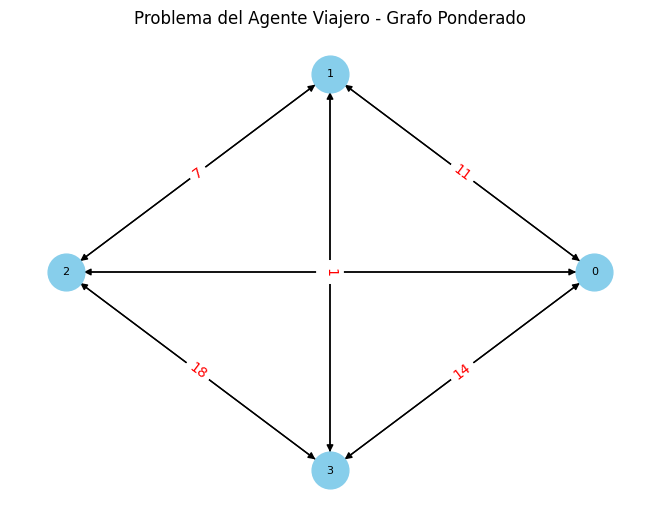

In [45]:
matriz_pesos = Matriz_W(4)

# Crear un grafo dirigido y agregar bordes con pesos
G = nx.DiGraph()
for i in range(len(matriz_pesos)):
    for j in range(len(matriz_pesos)):
        if matriz_pesos[i][j] != 0:
            G.add_edge(i, j, weight=matriz_pesos[i][j])

# Dibujar el grafo
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_color='black', font_size=8, arrowsize=10)

# Agregar etiquetas de peso en los bordes
etiquetas_pesos = {(i, j): matriz_pesos[i][j] for i in range(len(matriz_pesos)) for j in range(len(matriz_pesos)) if matriz_pesos[i][j] != 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_pesos, font_color='red')

# Mostrar el gráfico
plt.title("Problema del Agente Viajero - Grafo Ponderado")
plt.show()

### Funcion : **Grafico de un TSP Aleatorio**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def Matriz_W(n):
  W = np.random.randint(1,20,size = (n,n))
  W = ( W + W.T )//2
  np.fill_diagonal(W,0)
  return W

def Graficar_W(W,size):
  # Crear un grafo dirigido y agregar bordes con pesos
  G = nx.DiGraph()
  for i in range(len(W)):
      for j in range(len(W)):
          if W[i][j] != 0:
              G.add_edge(i, j, weight=W[i][j])

  # Dibujar el grafo
  pos = nx.circular_layout(G)
  plt.figure(figsize=size)
  nx.draw(G, pos, with_labels=True, node_size=450, node_color='skyblue', font_color='black', font_size=8, arrowsize=6)

  # Agregar etiquetas de peso en los bordes
  etiquetas_pesos = {(i, j): W[i][j] for i in range(len(W)) for j in range(len(W)) if W[i][j] != 0}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_pesos, font_color='red')

  # Mostrar el gráfico
  plt.title("Problema del Agente Viajero - Grafo Ponderado")
  plt.show()

def GenerarTSP_Aleatorio(n,s=(6,6),verbose=False):
  W = Matriz_W(n)
  if verbose: Graficar_W(W,size=s)
  return W


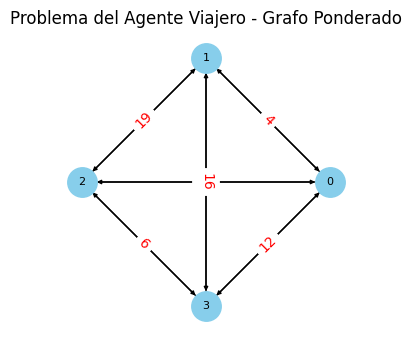

In [11]:
W = GenerarTSP_Aleatorio(4, s =(3,3),verbose=True)

## **Grafico de una** `lista de Ws`

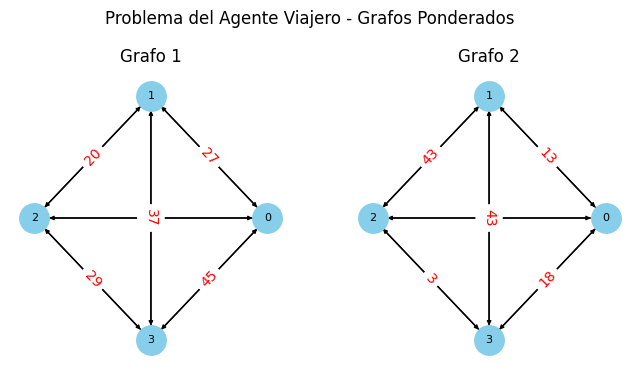

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def Graficar_Ws(lista_W, size):
    num_subplots = len(lista_W)

    # Crear una figura con subgráficos
    fig, axs = plt.subplots(1, num_subplots, figsize=(size[0] * num_subplots, size[1]), gridspec_kw={'top': 0.85})

    for idx, W in enumerate(lista_W):
        # Crear un grafo dirigido y agregar bordes con pesos
        G = nx.DiGraph()
        for i in range(len(W)):
            for j in range(len(W)):
                if W[i][j] != 0 and i != j:  # Evitar dibujar bordes hacia el mismo nodo
                    G.add_edge(i, j, weight=W[i][j])

        # Dibujar el grafo en el subgráfico correspondiente
        pos = nx.circular_layout(G)
        axs[idx].set_title(f"Grafo {idx + 1}")
        nx.draw(G, pos, with_labels=True, ax=axs[idx], node_size=450, node_color='skyblue', font_color='black', font_size=8, arrowsize=6)

        # Agregar etiquetas de peso en los bordes
        etiquetas_pesos = {(i, j): W[i][j] for i in range(len(W)) for j in range(len(W)) if W[i][j] != 0 and i != j}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_pesos, font_color='red', ax=axs[idx])

    # Mostrar la figura con todos los subgráficos
    plt.suptitle("Problema del Agente Viajero - Grafos Ponderados", y=1)
    plt.show()

# Ejemplo de uso con dos matrices aleatorias de 4x4
W1 = np.random.randint(1, 50, size=(4, 4))
W2 = np.random.randint(1, 50, size=(4, 4))

Graficar_Ws([W1, W2], size=(4, 4))



## TSP - Fuerza Bruta

In [12]:
import numpy as np
import time
import pandas as pd

def FirstRestriction(x,n):
  for j in range(n):
    s=0
    for i in range(n):
      if i!=j:
        s += x[i][j]
    # La suma para este J debe ser 1
    if(s!=1):
      return False
  return True

def SecondRestriction(x,n):
  for i in range(n):
    s=0
    for j in range(n):
      if j!=i:
        s += x[i][j]
    # La suma para este i debe ser 1
    if(s!=1):
      return False
  return True

def ThirdRestriction(x,n):
  ini = 2
  fin = n-2;
  conjunto = list(range(n))
  for n_sub in range(ini,fin+1):
    for U in subConjunto(n,n_sub):
      s = 0
      for i in U:
        for j in Complemento(U,n):
          s += x[i][j]
      if s<1:
        return False
  return True

def subConjunto(n,m):
  # n>m
  Subconjuntos = []
  for i in range(2**n):
    binario = bin(i)[2:].zfill(n)
    if(binario.count("1")== m ):
      combinacion = [j for j,bit in enumerate(binario) if bit=="1"]
      Subconjuntos.append(combinacion)
  return Subconjuntos

def Complemento(U,n):
  return [j for j in range(n) if all(j != k for k in U)]

def CheckRestrictions(X,N):
  cond1 = FirstRestriction(X,N)
  cond2 = SecondRestriction(X,N)
  cond3 = ThirdRestriction(X,N)
  return cond1 and cond2 and cond3

def Costo(X,W):
  return np.sum(X*W)

def P_X(n, m):
    def Recursiva(x, fila, columna, m_rest, n):
        if m_rest == 0:
            lpos.append(x.copy())
            return
        for i in range(n):
            for j in range(n):
                if i != j and x[i][j] == 0:
                    x[i][j] = 1
                    Recursiva(x, i, j, m_rest-1, n)
                    x[i][j] = 0

    lpos = []  # Lista para almacenar las posiciones
    x = np.zeros((n, n), dtype=int)
    Recursiva(x, 0, 0, m, n)
    return lpos

def FillResults(dic,T_time,minCosto,S):
  dic["Tiempo"].append(T_time)
  dic["CostoMin"].append(minCosto)
  dic["Solucion"].append(S)

def RecorrerCamino(S,v0,W):
  n = len(S)
  P = [v0]
  r = ""
  visited = np.zeros(n)
  i = v0
  while not np.all(visited == 1):
    for j in range(n):
      if S[i][j] == 1 and visited[j] == 0:
        P.append(j)
        r+= f"{i} - ( Peso : {W[i][j]:3}) -> {j}\n"
        visited[j]=1
        i = j
        break
  return P,r

def AgenteViajero_FuerzaBruta(W,verbose=False):
  # Almacenamos el N
  n_f,n_c = np.shape(W)
  N = n_f

  # Definimos el inicio
  v0 = 0

  #Creamos un Dic de Resultados
  resultados ={
      "Algoritmo":["Fuerza Bruta"],
      "Tiempo": [],
      "Nodos": [N],
      "CostoMin":[],
      "Solucion": []
  }

  # inicio del tiempo
  inicio = time.time()

  # Almacenamos las Posibles Soluciones
  Posibles_Xij = P_X(N,N)
  # Variable solucion
  S = []
  minCosto = float("inf")
  #Buscamos el Minimo
  for Xij in Posibles_Xij:
    if(CheckRestrictions(Xij,N) and (Costo(Xij,W)) < minCosto ):
      minCosto = Costo(Xij,W)
      S = Xij

  fin = time.time()

  #Calculamos el tiempo
  T_time = fin - inicio

  # Recorremos Camino
  P,r = RecorrerCamino(S,v0,W)

  #Mostramos Camino
  if verbose: print(r)

  # Completamos Dic Resutlados
  FillResults(resultados,T_time,minCosto,P)

  df = pd.DataFrame(resultados)

  return df

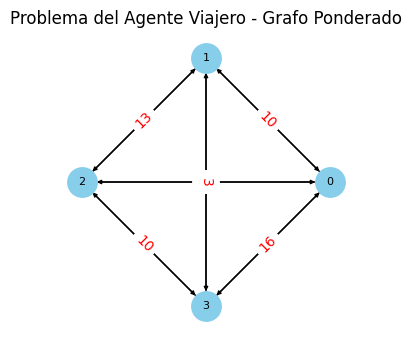

0 - ( Peso :  10) -> 1
1 - ( Peso :   3) -> 3
3 - ( Peso :  10) -> 2
2 - ( Peso :  13) -> 0



,Algoritmo,Tiempo,Nodos,CostoMin,Solucion
0,Fuerza Bruta,0.557413,4,36,"[0, 1, 3, 2, 0]"


In [15]:
W = GenerarTSP_Aleatorio(4,s = (3,3),verbose=True)
resultados = AgenteViajero_FuerzaBruta(W,verbose=True)
resultados

## TSP - LocalSearch

In [139]:
import random
import time
import numpy as np
import pandas as pd

def CostoVecino(Xv,W,verbose=False):
  s = 0
  n = len(Xv)
  r = ""
  for i in range(n-1):
    if verbose :
      r+=f"{Xv[i]} -(Peso:{W[Xv[i]][Xv[i+1]]})-> {Xv[i+1]}\n"
    s += W[Xv[i]][Xv[i+1]]

  return s,r

def FillResults(dic,T_time,minCosto,S):
  dic["Tiempo"].append(T_time)
  dic["CostoMin"].append(minCosto)
  dic["Solucion"].append(S)

def TSP_LocalSearch(W,iter=1500,verbose=False):
  ini = 0
  N,N_c = np.shape(W)

  #Creamos un Dic de Resultados
  resultados ={
      "Algoritmo":["LocalSearch"],
      "Tiempo": [],
      "Nodos": [N],
      "CostoMin":[],
      "Solucion": []
  }

  #Escogemos una solucion candidata aleatoria
  X0 = [ini] + random.sample(range(1,N),N-1) + [ini]
  MinCost = CostoVecino(X0,W)
  i=0
  # Iniciamos el cronometro
  t_inicio = time.time()
  while(i<iter):
    Xv = X0[1:-1].copy()
    e_inter = random.sample(Xv,2)
    indices_e_inter = [Xv.index(value) for value in e_inter]
    i1 = indices_e_inter[0]
    i2 = indices_e_inter[1]
    Xv[i1],Xv[i2]  =  Xv[i2],Xv[i1]
    Xv = [ini] + Xv + [ini]
    costo = CostoVecino(Xv,W)
    if(costo < MinCost ):
      MinCost=costo
      X0 = Xv
    i+=1
  # Finalizamos el cronometro
  t_final = time.time()
  T = t_final - t_inicio
  s,r = CostoVecino(X0,W)

  if verbose: print(f"Camino [LocalSearch]:\n{r}")
  FillResults(resultados,T,s,X0)

  df = pd.DataFrame(resultados)
  return df

In [44]:
df_localSearch = TSP_LocalSearch(W,iter=10000)

In [141]:
resultados

,Algoritmo,Tiempo,Nodos,CostoMin,Solucion
0,Fuerza Bruta,2.981956,4,31,"[0, 1, 2, 3, 0]"


## TSP - **Gready**

In [49]:
import time
import numpy as np

def FillResults(dic,T_time,minCosto,S):
  dic["Tiempo"].append(T_time)
  dic["CostoMin"].append(minCosto)
  dic["Solucion"].append(S)

def TSP_Gready(W,verbose=False):
  # Iniciamos el cronometro
  inicio = time.time()
  N,N_c = np.shape(W)

  #Creamos un dic de resultados
  resultados ={
      "Algoritmo":["Gready"],
      "Tiempo": [],
      "Nodos": [N],
      "CostoMin":[],
      "Solucion": []
  }

  #Definimos el valor inicial
  v0 = 0
  S = [v0]
  ini = S[0]
  visited = np.zeros(N)
  visited[0]=1
  # Iniciamos el algoritmo
  while not np.all(visited):
    minV = float('inf')
    for j in range(N_c):
      if W[ini][j]!=0 and W[ini][j]<minV and visited[j]==0:
        minV = W[ini][j]
        ind_Vecino = j
    visited[ind_Vecino]=1
    ini = ind_Vecino
    S.append(ind_Vecino)
  # Finalizamos el cronometro
  fin = time.time()
  #Calculamos el tiempo Total
  time_T = fin - inicio
  S.append(S[0])

  #imprimimos el camino
  s=0
  if verbose :print("Camino [Gready]:")
  for i in range(len(S)-1):
    s+=W[S[i]][S[i+1]]
    if verbose : print(f" {S[i]} -({W[S[i]][S[i+1]]})-> {S[i+1]}")

  # Rellenamos los resultados
  FillResults(resultados,time_T,s,S)

  #Retornamos dataframe
  return pd.DataFrame(resultados)

In [50]:
df_Gready = TSP_Gready(W)

In [51]:
resultados

,Algoritmo,Tiempo,Nodos,CostoMin,Solucion
0,Fuerza Bruta,0.557413,4,36,"[0, 1, 3, 2, 0]"


In [52]:
df_localSearch

,Algoritmo,Tiempo,Nodos,CostoMin,Solucion
0,LocalSearch,0.115285,4,36,"[0, 1, 3, 2, 0]"


In [53]:
df_Gready

,Algoritmo,Tiempo,Nodos,CostoMin,Solucion
0,Gready,0.000147,4,36,"[0, 1, 3, 2, 0]"


## Comparacion de Algoritmos

In [129]:
import pandas as pd

def Graficar_Ws(lista_W,size = (14,7)):
    if len(lista_W) > 7:
        # Si la lista es muy grande, tomar solo 5 valores aleatorios
        lista_W = random.sample(lista_W, 5)

    num_subplots = len(lista_W)

    # Crear una figura con subgráficos
    fig, axs = plt.subplots(1, num_subplots, figsize=(size[0] * num_subplots, size[1]), gridspec_kw={'top': 0.85})

    for idx, W in enumerate(lista_W):
        # Crear un grafo dirigido y agregar bordes con pesos
        G = nx.DiGraph()
        for i in range(len(W)):
            for j in range(len(W)):
                if W[i][j] != 0 and i != j:  # Evitar dibujar bordes hacia el mismo nodo
                    G.add_edge(i, j, weight=W[i][j])

        # Dibujar el grafo en el subgráfico correspondiente
        pos = nx.circular_layout(G)
        axs[idx].set_title(f"Grafo {idx + 1}")
        nx.draw(G, pos, with_labels=True, ax=axs[idx], node_size=450, node_color='skyblue', font_color='black', font_size=8, arrowsize=6)

        # Agregar etiquetas de peso en los bordes
        etiquetas_pesos = {(i, j): W[i][j] for i in range(len(W)) for j in range(len(W)) if W[i][j] != 0 and i != j}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_pesos, font_color='red', ax=axs[idx])

    # Mostrar la figura con todos los subgráficos
    plt.suptitle("Problema del Agente Viajero - Grafos Ponderados", y=1)
    plt.show()

def FillTable(tabla,algoritmos):
  for df in algoritmos:
    tabla["Algoritmo"].append(df["Algoritmo"][0])
    tabla["Tiempo"].append(df["Tiempo"][0])
    tabla["Nodos"].append(df["Nodos"][0])
    tabla["CostoMin"].append(df["CostoMin"][0])
    tabla["Solucion"].append(df["Solucion"][0])

def Comparacion_Algoritmos(n):
  #Definimos nuestro Diccionario General
  tabla ={
      "Algoritmo":[],
      "Tiempo": [],
      "Nodos": [],
      "CostoMin":[],
      "Solucion": []
  }

  if n <= 4 :
    List_W = []
    for i in range(3,n+1):
      W = GenerarTSP_Aleatorio(i)
      #Rellenamos los W
      List_W.append(W)
      df_FuerzaBruta = AgenteViajero_FuerzaBruta(W)
      df_localSearch = TSP_LocalSearch(W)
      df_Gready = TSP_Gready(W)
      Algoritmos = [df_FuerzaBruta,df_localSearch,df_Gready]
      #Rellenamos la tabla
      FillTable(tabla,Algoritmos)
    if n<20: Graficar_Ws(List_W, size = (n,n))
    return pd.DataFrame(tabla)
  else:
    List_W = []
    for i in range(3,n+1):
      W = GenerarTSP_Aleatorio(i)
      #Rellenamos los W
      List_W.append(W)
      df_localSearch = TSP_LocalSearch(W)
      df_Gready = TSP_Gready(W)
      Algoritmos = [df_localSearch,df_Gready]
      #Rellenamos la tabla
      FillTable(tabla,Algoritmos)
    if n<20: Graficar_Ws(List_W, size = (3,3))
    return pd.DataFrame(tabla)

In [144]:
tabla = Comparacion_Algoritmos(100)
tabla

,Algoritmo,Tiempo,Nodos,CostoMin,Solucion
0,LocalSearch,0.011673,3,28,"[0, 1, 2, 0]"
1,Gready,0.000120,3,28,"[0, 1, 2, 0]"
2,LocalSearch,0.015528,4,49,"[0, 1, 2, 3, 0]"
3,Gready,0.000138,4,49,"[0, 3, 2, 1, 0]"
4,LocalSearch,0.014029,5,52,"[0, 3, 1, 4, 2, 0]"
...,...,...,...,...,...
191,Gready,0.007982,98,243,"[0, 63, 59, 30, 47, 15, 40, 14, 90, 57, 23, 48..."
192,LocalSearch,0.057925,99,474,"[0, 70, 88, 55, 49, 85, 27, 81, 13, 22, 18, 56..."
193,Gready,0.007410,99,259,"[0, 3, 41, 42, 7, 60, 6, 11, 39, 51, 17, 61, 5..."
194,LocalSearch,0.058071,100,491,"[0, 69, 64, 46, 38, 11, 36, 41, 76, 23, 92, 86..."


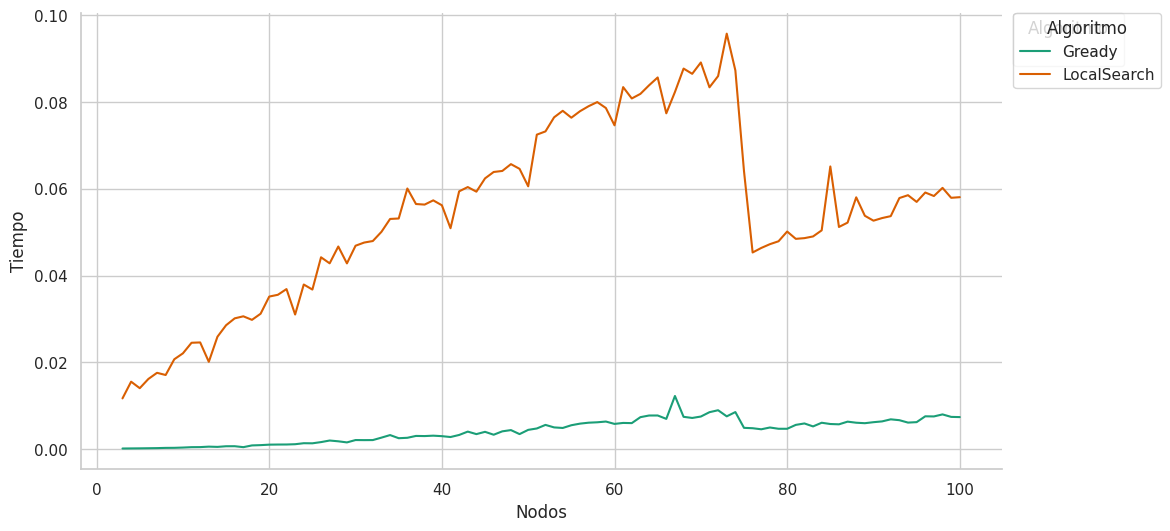

In [145]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Nodos']
  ys = series['Tiempo']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabla.sort_values('Nodos', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algoritmo')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algoritmo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Nodos')
_ = plt.ylabel('Tiempo')

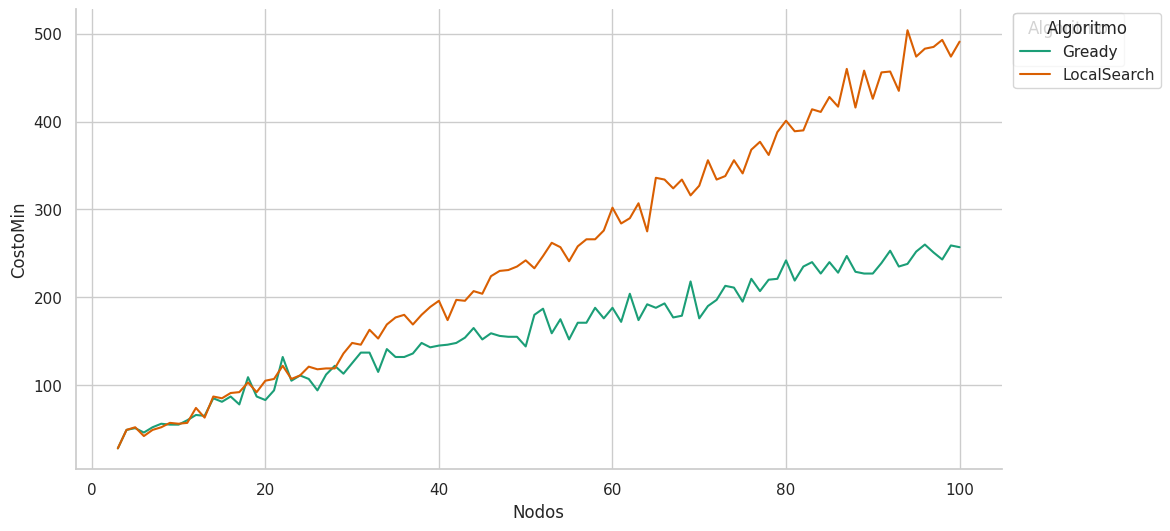

In [146]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Nodos']
  ys = series['CostoMin']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabla.sort_values('Nodos', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algoritmo')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algoritmo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Nodos')
_ = plt.ylabel('CostoMin')

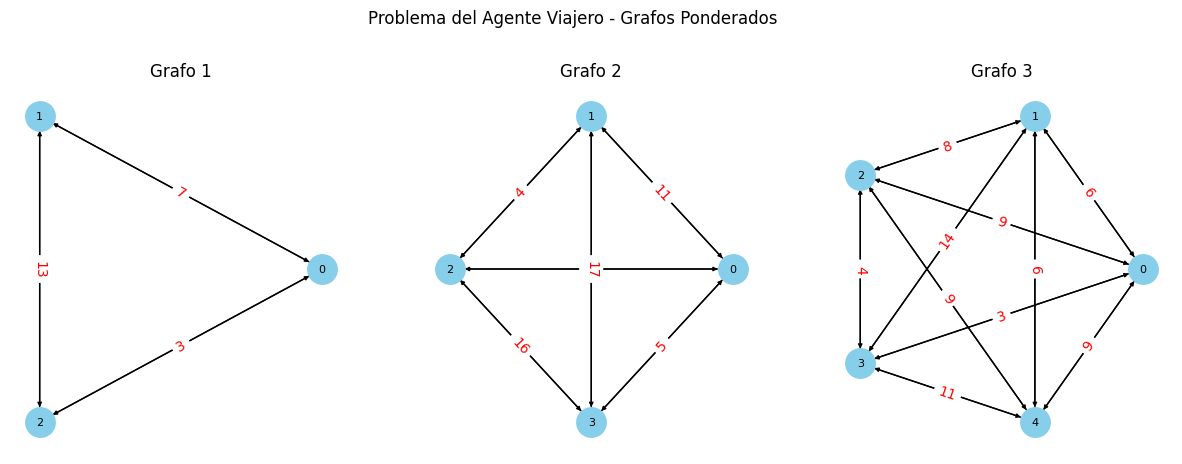

,Algoritmo,Tiempo,Nodos,CostoMin,Solucion
0,Fuerza Bruta,0.005126,3,23,"[0, 1, 2, 0]"
1,LocalSearch,0.024328,3,23,"[0, 2, 1, 0]"
2,Gready,0.000102,3,23,"[0, 2, 1, 0]"
3,Fuerza Bruta,0.741250,4,33,"[0, 2, 1, 3, 0]"
4,LocalSearch,0.005261,4,33,"[0, 2, 1, 3, 0]"
5,Gready,0.000083,4,36,"[0, 3, 2, 1, 0]"
6,Fuerza Bruta,205.686931,5,28,"[0, 1, 4, 2, 3, 0]"
7,LocalSearch,0.005628,5,28,"[0, 1, 4, 2, 3, 0]"
8,Gready,0.000095,5,30,"[0, 3, 2, 1, 4, 0]"


In [76]:
tabla = Comparacion_Algoritmos(5)
tabla